In [2]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import sample as sm
import hr_full as hr
import hr_restrict as hrr
# warnings.filterwarnings('ignore')

In [3]:
L63_data_folder = '../data/L63-trajectories'
u = np.load('{}/validation.npy'.format(L63_data_folder))
rs = hr.GoodRowSampler(0.4, 3.5, u.T)
w, b = rs.sample(500, steps=10)

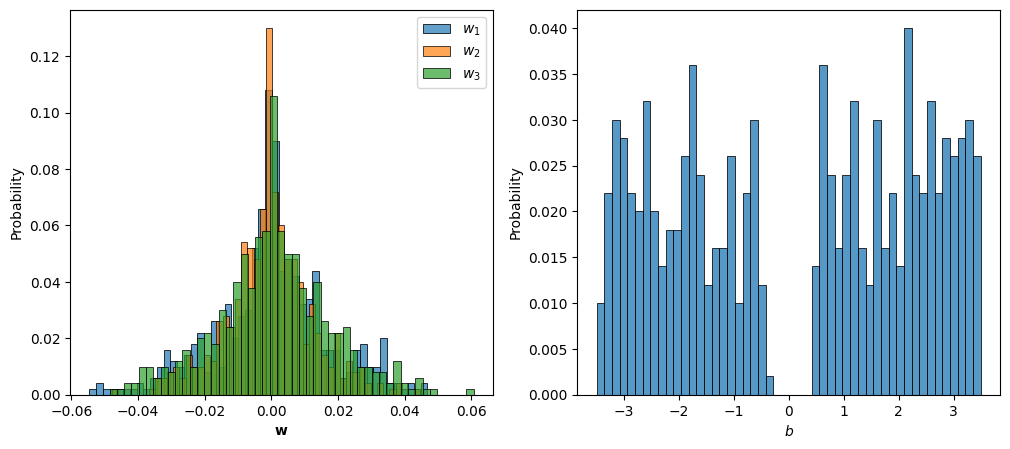

In [38]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

sns.histplot(w[:, 0], ax=ax, stat='probability', label=r'${w}_1$', alpha=0.7, bins=50)
sns.histplot(w[:, 1], ax=ax, stat='probability', label=r'${w}_2$', alpha=0.7, bins=50)
sns.histplot(w[:, 2], ax=ax, stat='probability', label=r'${w}_3$', alpha=0.7, bins=50)

sns.histplot(b, ax=ax1, stat='probability', bins=50)
# ax1.axvline(-.4, c='black')
# ax1.axvline(.4, c='black')
ax.set_xlabel(r'$\mathbf{w}$')
ax.legend()
ax1.set_xlabel(r'$b$')
plt.savefig(r'../data/plots/hr_params.png')

In [24]:
rs = hrr.GoodRowSampler(0.4, 3.5, u)
wb = rs.sample(500)
w, b = wb[:, :-1], wb[:, -1]

Time taken by sample is 0.0140 seconds


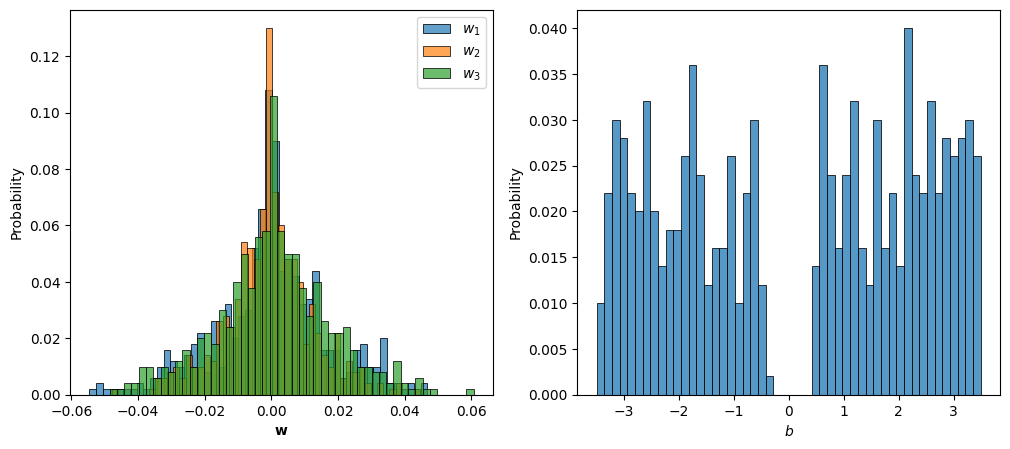

In [39]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

sns.histplot(w[:, 0], ax=ax, stat='probability', label=r'${w}_1$', alpha=0.7, bins=50)
sns.histplot(w[:, 1], ax=ax, stat='probability', label=r'${w}_2$', alpha=0.7, bins=50)
sns.histplot(w[:, 2], ax=ax, stat='probability', label=r'${w}_3$', alpha=0.7, bins=50)

sns.histplot(b, ax=ax1, stat='probability', bins=50)
# ax1.axvline(3.5, c='black')
ax.set_xlabel(r'$\mathbf{w}$')
ax.legend()
ax1.set_xlabel(r'$b$')
plt.savefig(r'../data/plots/rhr_params.png')

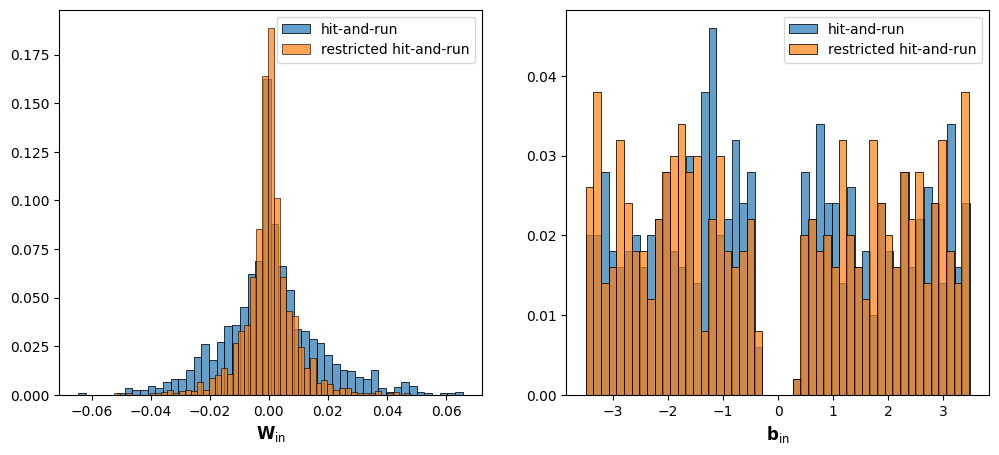

In [45]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# w1, b1 = hr.GoodRowSampler(0.4, 3.5, u.T).sample(500, steps=10)
# wb = hrr.GoodRowSampler(0.4, 3.5, u).sample(500)
w2, b2 = wb[:, :-1], wb[:, -1]
sns.histplot(w1.flatten(), ax=ax, stat='probability', label=r'hit-and-run', alpha=0.7, bins=50)
sns.histplot(w2.flatten(), ax=ax, stat='probability', label=r'restricted hit-and-run', alpha=0.7, bins=50)
# sns.histplot(w[:, 2], ax=ax, stat='probability', label=r'${w}_3$', alpha=0.7, bins=50)

sns.histplot(b1, ax=ax1, stat='probability', label=r'hit-and-run', alpha=0.7,bins=50)
sns.histplot(b2, ax=ax1, stat='probability', label=r'restricted hit-and-run', alpha=0.7, bins=50)
# ax1.axvline(3.5, c='black')
ax.set_xlabel(r'$\mathbf{W}_{{\rm in}}$', fontsize=12)
ax.legend()
ax1.legend()
ax.set_ylabel('')
ax1.set_ylabel('')
ax1.set_xlabel(r'$\mathbf{b}_{{\rm in}}$', fontsize=12)
plt.savefig(r'../data/plots/hit-and-run-params.png')

In [27]:
w1.flatten().mean(), w2.flatten().mean()

(0.000510994493749852, -5.553118933958009e-05)